![image info](https://ineuron.ai/images/ineuron-logo.png)

###  Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import boxcox1p
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings("ignore")

%matplotlib inline

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/hr_imputed.csv')

#### Show Top 5 Records

In [3]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Undefined,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,Small & Medium-org.,Pvt Ltd,5,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,Undefined,NaN,0,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0,Undefined,Pvt Ltd,0,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,Small & Medium-org.,Funded Startup,4,8,0.0


#### Shape of the dataset

In [4]:
df.shape

(19158, 13)

#### Before Capping Outliers 

In [10]:
features = ['city_development_index','training_hours']
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
num_df = df[numeric_features]

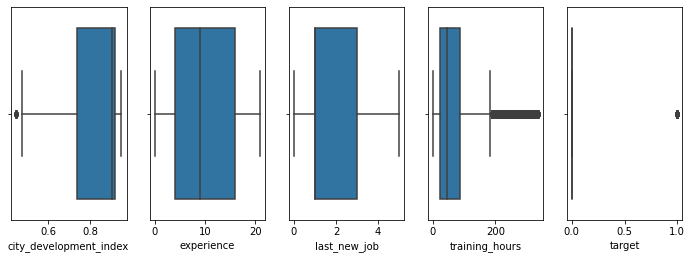

In [11]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

#### Insights
- As we can observe we have outliers only in 'city_development_index' and'training_hours'

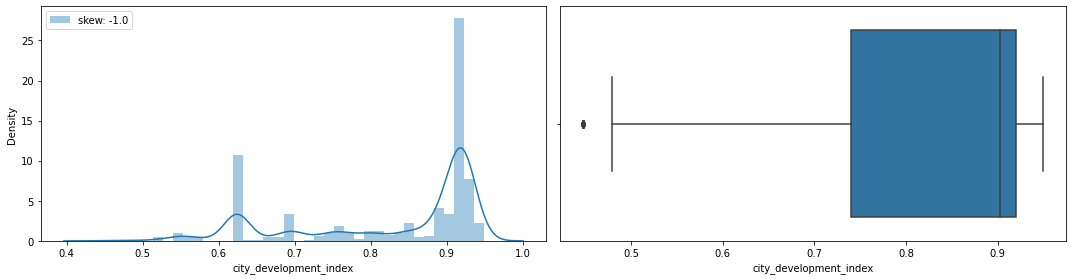

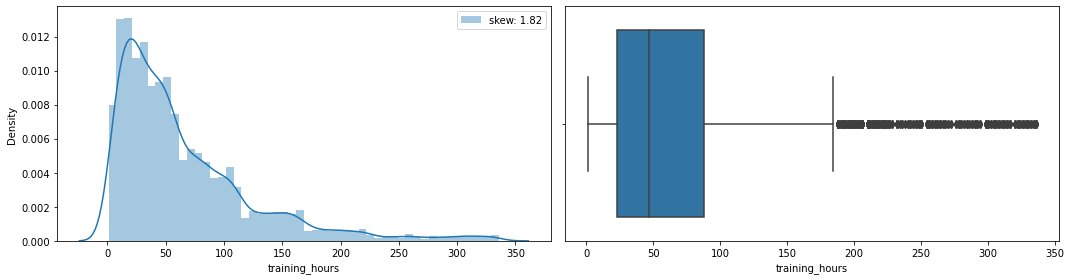

In [12]:
#sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.show()

In [13]:
df_cap = df.copy()

####  Interquartile Range Method( IQR ) method

In [14]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [15]:
iqr_capping(df_cap, features, 1.5)

#### After Outliers Capping

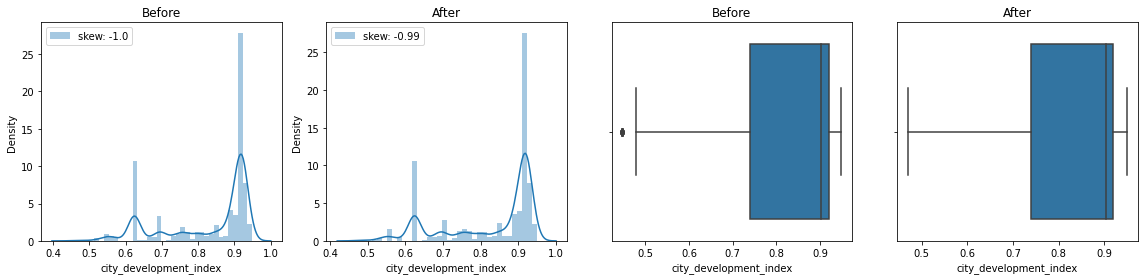

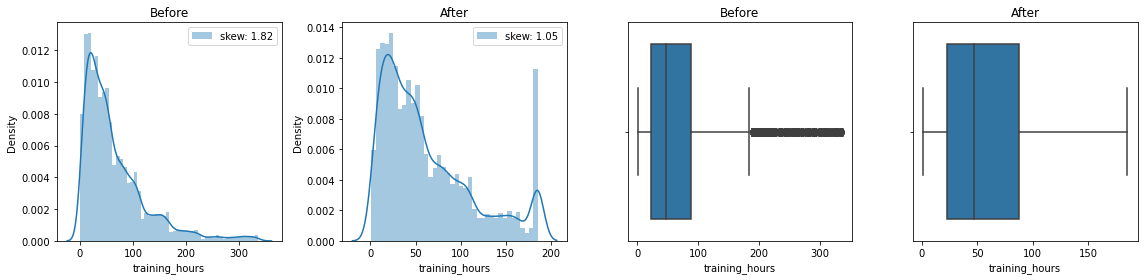

In [16]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

#### Compare Skewness

In [17]:
df['training_hours'].skew()

1.8192372420221026

In [18]:
df_cap['training_hours'].skew()

1.054331975804928

#### Some skewness has reduced for 'training_hours' feature